# CNN Based视觉骨架网络

Minimal,  System, Insight, Programming

---
**课程内容**：
1. 掌握CNN视觉网络设计特点
2. 了解CNN网络发发展线索，ResNet等网络设计理念
3. 通过代码实践，掌握主流CNN网络建模方式，训练流程，采用预训练权重，对比不同网络精度


   卷积神经网络是一种用来处理局部和整体相关性的计算网络结构，被应用在图像识别、自然语言处理甚至是语音识别领域，因为图像数据具有显著的局部与整体关系，使其在图像识别领域的应用获得了巨大的成功。

## 卷积神经网络的组成层

以图像分类任务为例，卷积神经网络中，一般包含5种类型的网络层次结构：


| CNN层次结构 |             输入尺寸              | 作用                                                         |
| :---------: | :-------------------------------: | :----------------------------------------------------------- |
|   输入层    |      $$B\times 3\times W_1\times H_1$$  | 卷积网络的原始输入，可以是原始或预处理后的像素矩阵           |
|   卷积层    |      $$B\times K\times W_1\times H_1$$      | 参数共享、局部连接，利用平移不变性从全局特征图提取局部特征   |
|   激活层    |      $$B\times K\times W_1\times H_1$$      | 将卷积层的输出结果进行非线性映射                           |
|   池化层（pooling）    |      $$B\times K\times W_1\times H_1$$      | 进一步筛选特征，可以有效减少后续网络层次所需的参数量         |
|  全连接层   | $$B\times K\times(W_2 \cdot H_2 )$$ | 将多维特征展平为2维特征，通常低维度特征对应任务的学习目标（类别或回归值） |

> $3\times W_1\times H_1 $对应原始图像或经过预处理的像素值矩阵，3对应RGB图像的通道;$K$表示卷积层中卷积核（滤波器）的个数;$W_2\times H_2$ 为池化后特征图的尺度，在全局池化中尺度对应$1\times 1$;$(W_2 \cdot H_2)$是将多维特征压缩到1维之后的大小，输出维度是图像类别个数。

## 输入层

输入层(Input Layer)通常是输入卷积神经网络的原始数据或经过预处理的数据，可以是图像识别领域中原始三维的彩色图像，也可以是音频识别领域中经过傅利叶变换的二维波形数据，甚至是自然语言处理中一维表示的句子向量。以图像分类任务为例，输入层输入的图像一般包含RGB三个通道，是一个由长宽分别为$H$和$W$组成的3维像素值矩阵$3\times H\times W $，卷积网络会将输入层的数据传递到一系列卷积、池化等操作进行特征提取和转化，最终由全连接层对特征进行汇总和结果输出。根据计算能力、存储大小和模型结构的不同，卷积神经网络每次可以批量处理的图像个数不尽相同，若指定输入层接收到的图像个数为$N$，则输入层的输出数据为$N\times 3\times H\times W$。

## 卷积层

假设有一个 5\*5 的图像，使用一个 3\*3 的 filter 进行卷积，想得到一个 3*3 的 Feature Map，如下所示：

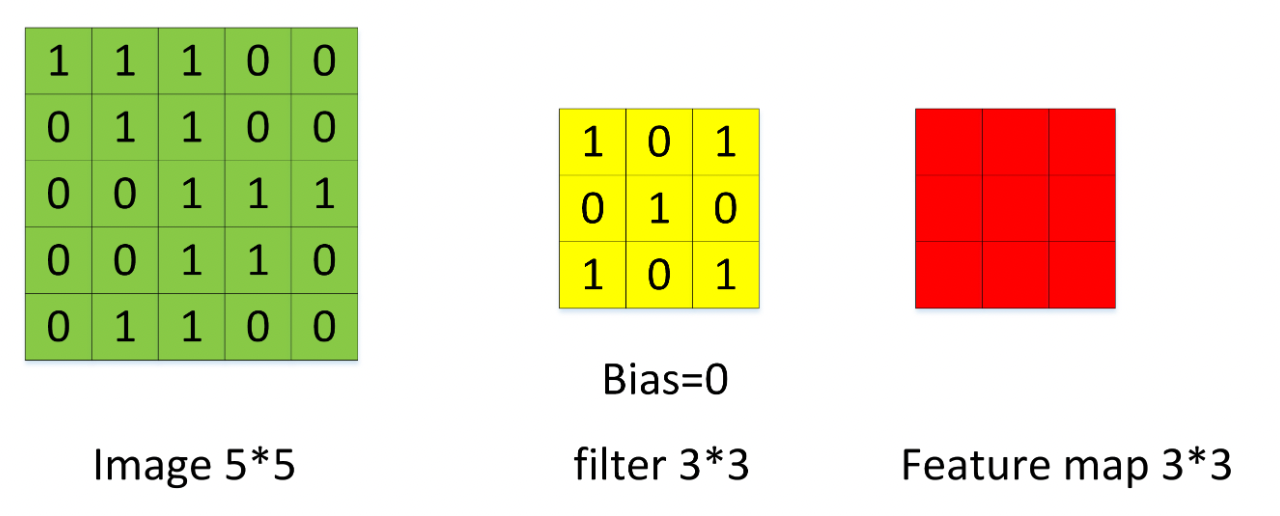

当步长为1时，计算 feature map 元素时，其计算过程图示如下：

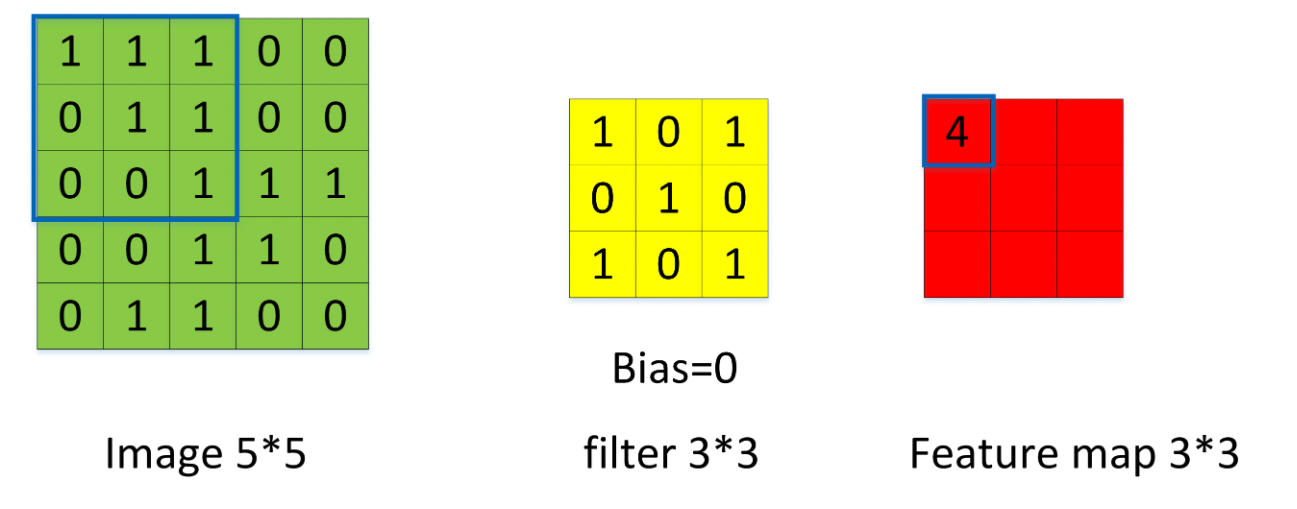

以此类推，计算出全部的Feature Map。

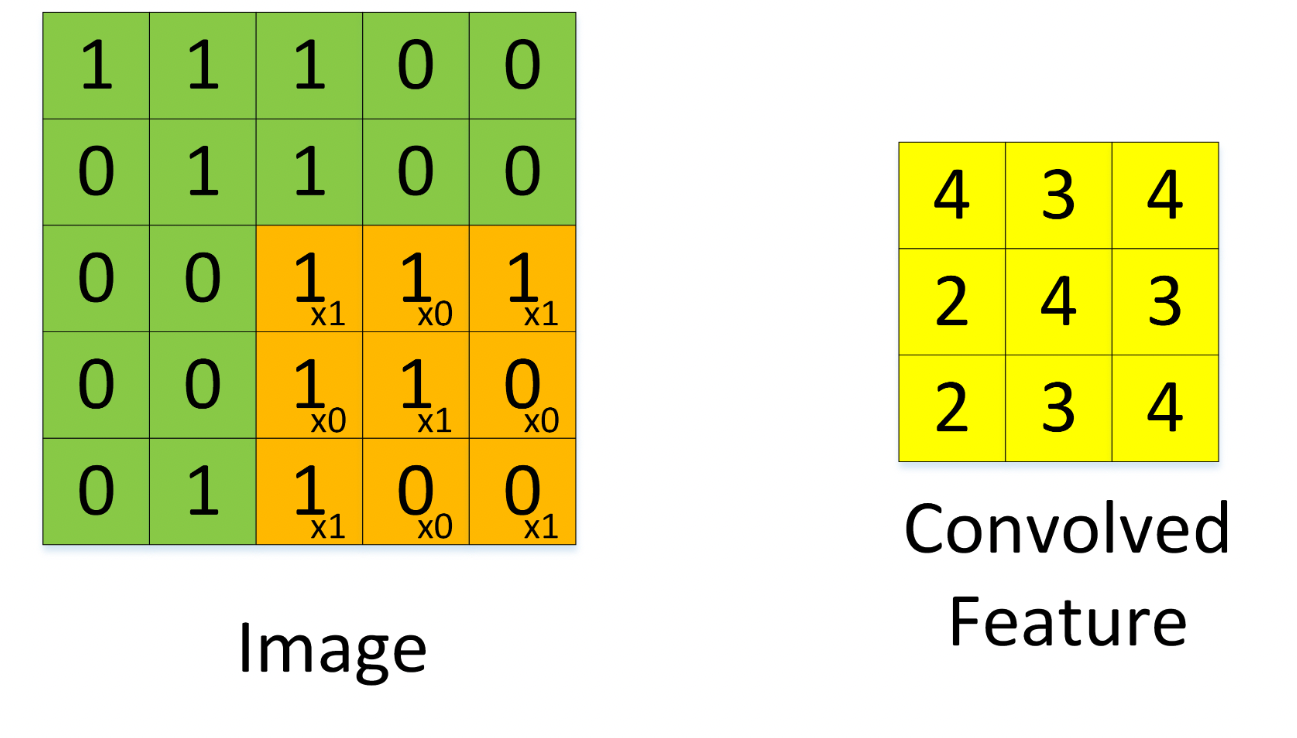

在卷积操作过程中，矩阵经卷积操作后的尺寸由以下几个因数决定：

- 输入图片大小 W×W
- Filter大小 F×F
- 步长 S
- padding的像素数 P

经卷积后的矩阵尺寸大小计算公式为：
$$N = (W -F + 2P)/S + 1$$

如果卷积前的图像深度为 $ D $，那么相应的 filter 的深度也必须为 $ D $。深度大于 1 的卷积计算公式：
$$ a_{i,j} = f(\sum_{d=0}^{D-1} \sum_{m=0}^{F-1} \sum_{n=0}^{F-1} w_{d,m,n} x_{d,i+m,j+n} + w_b)$$ 

其中，$ D $ 是深度；$ F $ 是 filter 的大小；$ w_{d,m,n} $ 表示 filter 的第 $ d $ 层第 $ m $ 行第 $ n $ 列权重；$ a_{d,i,j} $ 表示 feature map 的第 $ d $ 层第 $ i $ 行第 $ j $ 列像素。

每个卷积层可以有多个 filter。每个 filter 和原始图像进行卷积后，都可以得到一个 Feature Map。卷积后 Feature Map 的深度(个数)和卷积层的 filter 个数相同。下面的图示显示了包含两个 filter 的卷积层的计算。$[7, 7, 3] $ 输入，经过两个 $[3,3,3]$ filter 的卷积(步幅为 2)，得到了 $[3, 3, 2]$ 的输出。图中的 Zero padding 是 1，也就是在输入元素的周围补了一圈0 。

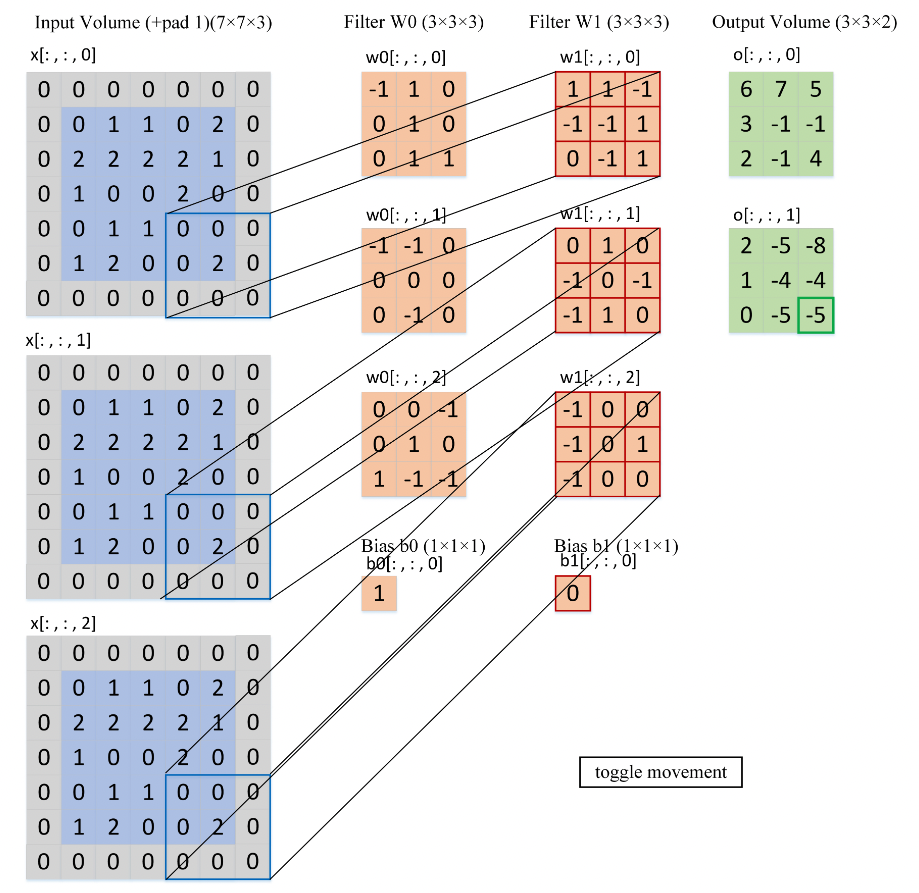

## 池化层(最大池化和平均池化)

无论是调整步长还是加入填充，都希望能够自由控制特征图的尺寸。除了卷积层之外，另一种可以高效减小特征图尺寸的操作是“池化”Pooling。池化是一种非常简单（甚至有些粗暴的）的降维方式，经常跟在卷积层之后，用以处理特征图。最常见的是最大池化（Max Pooling）和平均池化（Average Pooling）两种操作。

池化层也有核，但它的核没有值，只有尺寸。在下图之中，池化核的尺寸就是(2,2)。池化核的移动也有步长stride，但默认步长就等于它的核尺寸，这样可以保证它在扫描特征图时不出现重叠。当然，如果需要，我们也可以设置参数令池化核的移动步长不等于核尺寸，在行业中这个叫“Overlapping
Pooling”，即重叠池化，但它不是非常常见。通常来说，对于特征图中每一个不重叠的、大小固定的矩阵，池化核都按照池化的标准对数字进行计算或筛选。在最大池化中，它选出扫描区域中最大的数字。在平均池化中，它对扫描区域中所有的数字求平均。以(2,2)的最大池化为例，过程如下图所示：

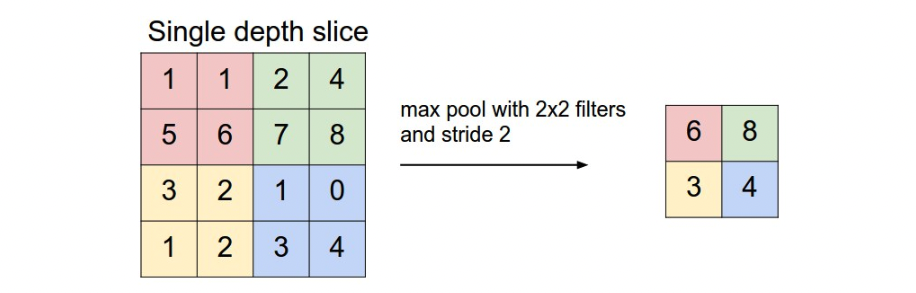

# 卷积神经网络

在知道卷积神经网络的基本原理后，将介绍卷积神经网络架构，许多现代卷积神经网络的研究都是建立在这基础上的。 每一个模型都曾一度占据主导地位，其中许多模型都是ImageNet竞赛的优胜者。ImageNet竞赛自2010年以来，一直是计算机视觉中监督学习进展的指向标。

这些模型包括：

- AlexNet。它是第一个在大规模视觉竞赛中击败传统计算机视觉模型的大型神经网络；
- 使用重复块的网络（VGG）。它利用许多重复的神经网络块；
- 含并行连结的网络（GoogLeNet）。它使用并行连结的网络，通过不同窗口大小的卷积层和max pooling层来并行抽取信息；
- 残差网络（ResNet）。它通过残差块构建跨层的数据通道，是计算机视觉中最流行的体系架构；

虽然深度神经网络的概念是直接将神经网络堆叠在一起。但由于不同的网络架构和超参数选择，这些神经网络的性能会发生很大变化。 神经网络是将人类直觉和相关数学见解结合后，经过大量研究试错后的结晶。 接下来会按时间顺序介绍这些模型，在追寻历史的脉络的同时，了解对该领域发展的直觉。例如，批量规范化（batch normalization）和残差网络（ResNet）为设计和训练深度神经网络提供了重要思想指导。

 # LeNet-5
 
LeNet是最早发布的卷积神经网络之一，因其在计算机视觉任务中的高效性能而受到广泛关注。 这个模型是由AT&T贝尔实验室的研究员Yann LeCun在1989年提出的（并以其命名），目的是识别图像中的手写数字。 当时，Yann LeCun发表了第一篇通过反向传播成功训练卷积神经网络的研究，这项工作代表了十多年来神经网络研究开发的成果。
 
总体来看，LeNet-5由两个部分组成：

- 卷积编码器：由两个卷积层组成;
- 全连接层密集块：由三个全连接层组成。

网络结构如下图所示：

 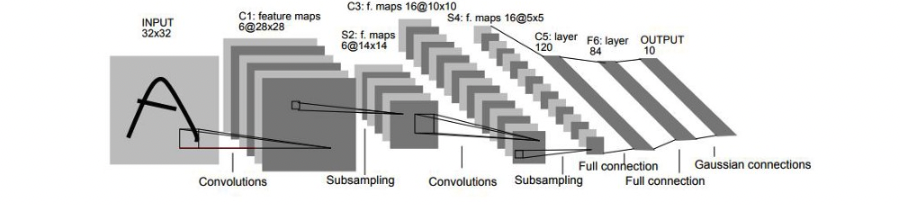

每个卷积块中的基本单元是一个卷积层、一个激活函数和pooling层。这些层将输入映射到多个二维特征输出，通常同时增加通道的数量。第一卷积层有6个输出通道，而第二个卷积层有16个输出通道。每个$2\times 2$池操作（步幅2）通过空间下采样将维数减少4倍。卷积的输出形状由批量大小、通道数、高度、宽度决定。

为了将卷积块的输出传递给稠密块，必须在小批量中展平每个样本。换言之，将这个四维输入转换成全连接层所期望的二维输入。这里的二维表示的第一个维度索引小批量中的样本，第二个维度给出每个样本的平面向量表示。LeNet的稠密块有三个全连接层，分别有120、84和10个输出。因为在执行分类任务，所以输出层的10维对应于最后输出结果的数量。

网络代码如下：

In [1]:
# 导入库
import torch
from torch import nn
from torch.nn import functional as F

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))    # input(3, 32, 32) output(16, 28, 28)
        x = self.pool1(x)            # output(16, 14, 14)
        x = F.relu(self.conv2(x))    # output(32, 10, 10)
        x = self.pool2(x)            # output(32, 5, 5)
        x = x.view(-1, 32*5*5)       # output(32*5*5)
        x = F.relu(self.fc1(x))      # output(120)
        x = F.relu(self.fc2(x))      # output(84)
        x = self.fc3(x)              # output(10)
        return x
data = torch.ones(size=(8,3,32,32))
net = LeNet()
pre = net(data)
pre.shape

torch.Size([8, 10])

注：以上是torch更新的LeNet网络和论文中不同的是将sigmoid激活函数和mean pooling层替换为relu和max pooling层。

# AlexNet

LeNet5作为现代卷积网络的奠基者并没有引起太大的水花，大多数人并不相信机器提取的特征能够比人亲自提取的特征更强大，事实上，LeNet5也确实无法在复杂任务上战胜传统计算机视觉方法。卷积网络在被提出的几十年内一直在蛰伏，直到2012年，AlexNet横空出世，真正第一
次证明了，当数据量达标、训练得当时，卷积神经网络提取的特征效果远远胜过人类提取的特征。

AlexNet和LeNet的架构非常相似，如下图所示。 注意，这里我们提供了一个稍微精简版本的AlexNet，去除了当年需要两个小型GPU同时运算的设计特点。

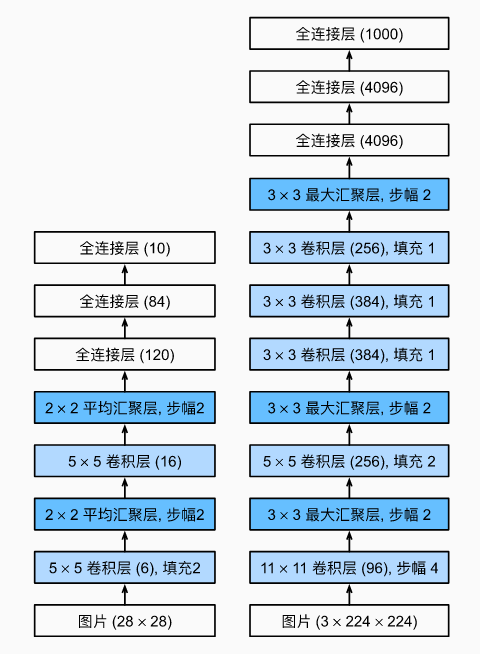
$$图 从LeNet(左)到AlexNet(右)$$
AlexNet和LeNet的设计理念非常相似，但也存在差异。 首先，AlexNet比相对较小的LeNet5要深得多。 AlexNet由八层组成：五个卷积层、两个全连接隐藏层和一个全连接输出层。 其次，AlexNet使用ReLU而不是sigmoid作为其激活函数。

在AlexNet的第一层，卷积窗口的形状是$11 \times 11$。 由于ImageNet中大多数图像的宽和高比MNIST图像的多10倍以上，因此，需要一个更大的卷积窗口来捕获目标。 第二层中的卷积窗口形状被缩减为$5 \times 5$，然后是$3 \times 3$。 此外，在第一层、第二层和第五层卷积层之后，加入窗口形状为$3 \times 3$、步幅为2的max pooling层。 而且，AlexNet的卷积通道数目是LeNet的10倍。

在最后一个卷积层后有两个全连接层，分别有4096个输出。 这两个巨大的全连接层拥有将近1GB的模型参数。 由于早期GPU显存有限，原版的AlexNet采用了双数据流设计，使得每个GPU只负责存储和计算模型的一半参数。 幸运的是，现在GPU显存相对充裕，所以现在很少需要跨GPU分解模型（因此，AlexNet模型在这方面与原始论文稍有不同）。

此外，AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。 一方面，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。 另一方面，当使用不同的参数初始化方法时，ReLU激活函数使训练模型更加容易。

AlexNet代码如下：

In [3]:
import torch
from torch import nn
from torch.nn import functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,96,kernel_size=11, stride=4)
        self.pool1 = nn.MaxPool2d(kernel_size=3,stride=2)
        
        #卷积核、步长恢复正常大小，进一步扩大通道
        self.conv2 = nn.Conv2d(96,256,kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3,stride=2)
        
        #连续的卷积层，疯狂提取特征
        self.conv3 = nn.Conv2d(256,384,kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(384,384,kernel_size=3,padding=1)
        self.conv5 = nn.Conv2d(384,256,kernel_size=3,padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=3,stride=2)
        
        #全连接层
        self.fc1 = nn.Linear(256*6*6,4096) #这里的上层输入是图像中的全部像素
        self.fc2 = nn.Linear(4096,4096)
        self.fc3 = nn.Linear(4096,1000) #输出ImageNet的一千个类别
    
    def forward(self,x):
        
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool3(x)
        
        x = x.view(-1,256*6*6) #需要将数据的特征部分“拉平”才能够进入FC层
        
        x = F.relu(F.dropout(self.fc1(x),0.5)) #dropout：随机让50%的权重为0
        x = F.relu(F.dropout(self.fc2(x),0.5))
        output = F.softmax(self.fc3(x),dim=1)
        return output
data = torch.ones(size=(8,3,227,227)) #假设图像的尺寸为227x227
net = Model()
pre = net(data)
pre.shape

torch.Size([8, 1000])

# VGGNet

虽然AlexNet证明深层神经网络卓有成效，但是并没有回答如何设计更深的网络。牛津大学的视觉几何组（visualgeometry group）提出一种模块化设计的深度网络：VGG，通过模块堆叠，能快速实现有效的深层网络，VGG11/VGG16/VGG19 就是采用不同的模块策略的网络。


VGG网络中，单个模块有三个参数，分别对应于卷积层的数量num_convs、输入通道的数量in_channels 和输出通道的数量out_channels.

In [4]:
import torch
from torch import nn


def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

与AlexNet、LeNet一样，VGG网络可以分为两部分：第一部分主要由卷积层和pooling层组成，第二部分由全连接层组成，VGG网络结构如下图所示：

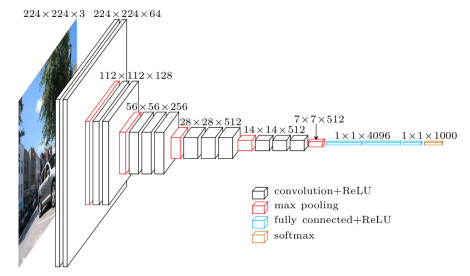

以VGG-11为例，网络代码如下：

In [5]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
net = vgg(conv_arch)
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


# GoogLeNet

GoogLeNet在2014年(与VGG网络同年)由Google团队提出，斩获当年ImageNet竞赛中Classification Task (分类任务) 第一名。原论文名称是《Going deeper with convolutions》，下面是该网络的缩略图。

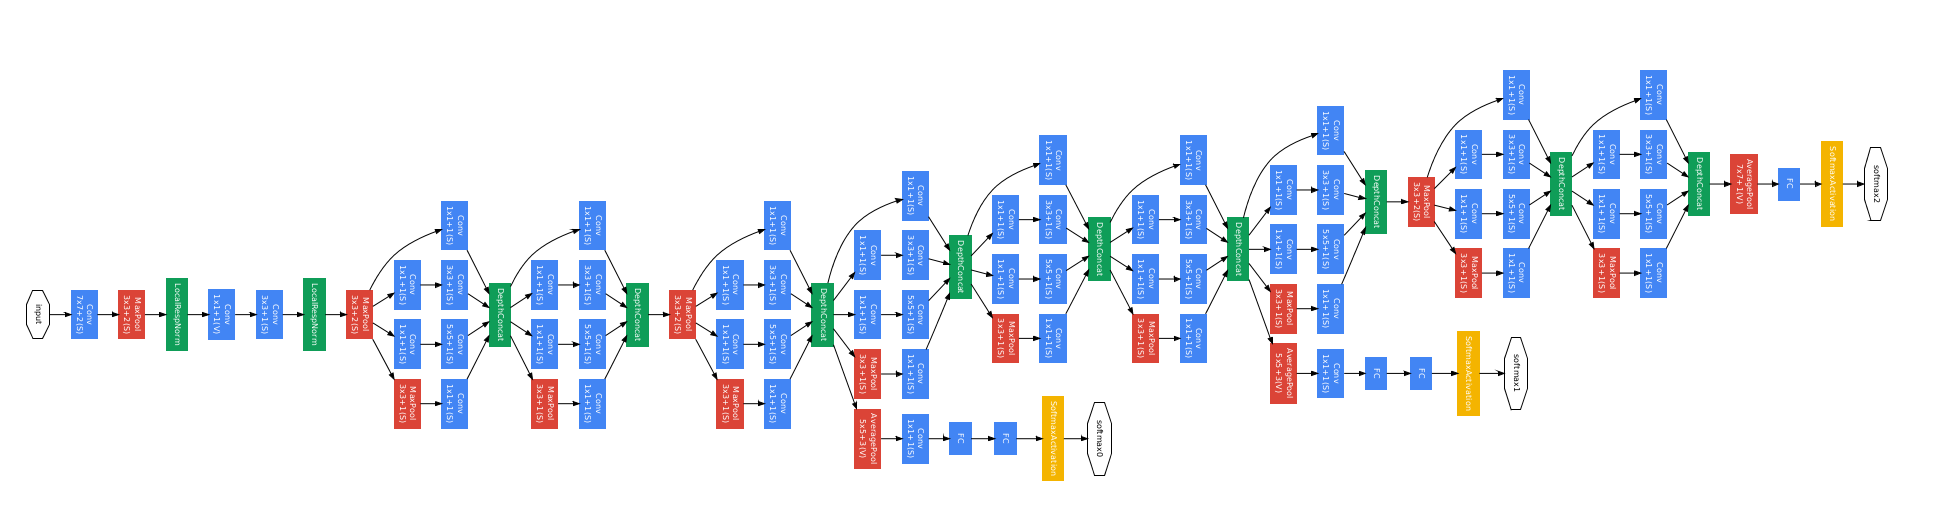

网络中的亮点如下：

（1）引入了Inception结构（融合不同尺度的特征信息）<br>
（2）使用1x1的卷积核进行降维以及映射处理 （虽然VGG网络中也有，但该论文介绍的更详细）<br>
（3）添加两个辅助分类器帮助训练<br>
（4）丢弃全连接层，使用平均池化层（大大减少模型参数，除去两个辅助分类器，网络大小只有vgg的1/20）<br>

## Inception结构

Inception结构如下图所示，左图是论文中提出的inception原始结构，右图是inception加上降维功能的结构。在Inception块中，所有卷积、池化层的输入、输出以及核大小都需要进行输入。接下来我们以网络中的第一个Inception块为例进行实现。
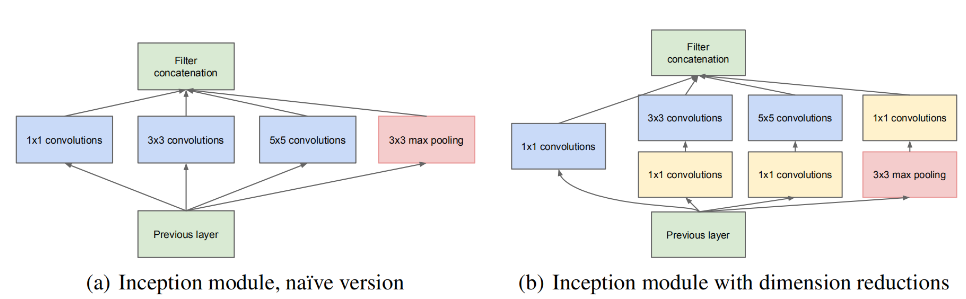


inception结构一共有4个分支，也就是说我们的输入的特征矩阵并行的通过这四个分支得到四个输出，然后在在将这四个输出在深度维度（channel维度）进行拼接得到我们的最终输出（注意，为了让四个分支的输出能够在深度方向进行拼接，必须保证四个分支输出的特征矩阵高度和宽度都相同）。

分支1是卷积核大小为1x1的卷积层，stride=1，<br>
分支2是卷积核大小为3x3的卷积层，stride=1，padding=1（保证输出特征矩阵的高和宽和输入特征矩阵相等），<br>
分支3是卷积核大小为5x5的卷积层，stride=1，padding=2（保证输出特征矩阵的高和宽和输入特征矩阵相等），<br>
分支4是池化核大小为3x3的最大池化下采样，stride=1，padding=1（保证输出特征矩阵的高和宽和输入特征矩阵相等）。<br>

在分支2，3，4上加入了卷积核大小为1x1的卷积层，目的是为了降维，减少模型训练参数，减少计算量。

In [6]:
class BasicConv2d(nn.Module):
    def __init__(self,in_channels, out_channels,**kwargs
                ):
        super().__init__()
        self.conv = nn.Sequential(nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
                                 ,nn.BatchNorm2d(out_channels)
                                 ,nn.ReLU(inplace=True))
    def forward(self,x):
        x = self.conv(x)
        return x
    
    
class Inception(nn.Module):
    def __init__(self
                 ,in_channels : int
                 ,ch1x1 : int
                 ,ch3x3red : int
                 ,ch3x3 : int
                 ,ch5x5red : int
                 ,ch5x5 : int
                 ,pool_proj : int
                ):
        super().__init__()
        #1x1
        self.branch1 = BasicConv2d(in_channels,ch1x1,kernel_size=1)
        #1x1 + 3x3
        self.branch2 = nn.Sequential(BasicConv2d(in_channels, ch3x3red, kernel_size=1)
                                     ,BasicConv2d(ch3x3red, ch3x3, kernel_size=3,padding=1))
        #1x1 + 5x5
        self.branch3 = nn.Sequential(BasicConv2d(in_channels, ch5x5red, kernel_size=1)
                                     ,BasicConv2d(ch5x5red, ch5x5, kernel_size=5, padding=2))
        #pool + 1x1
        self.branch4 = nn.Sequential(nn.MaxPool2d(kernel_size=3,stride=1, padding=1,ceil_mode=True)
                                    ,BasicConv2d(in_channels,pool_proj,kernel_size=1))
    def forward(self,x):
        branch1 = self.branch1(x) #28x28,ch1x1
        branch2 = self.branch2(x) #28x28,ch3x3
        branch3 = self.branch3(x) #28x28,ch5x5
        branch4 = self.branch4(x) #28x28,pool_proj
        outputs = [branch1, branch2, branch3, branch4]
        return torch.cat(outputs, 1) #合并
inception_block = Inception(192, 64, 96, 128, 16, 32, 32)
data = torch.randn(8,192,64,64)
inception_block(data).shape

torch.Size([8, 256, 64, 64])

# resnet

ResNet网络是在2015年由微软实验室提出，斩获当年ImageNet竞赛中分类任务第一名，目标检测第一名。获得COCO数据集中目标检测第一名，图像分割第一名。下图是ResNet34层模型的结构简图:




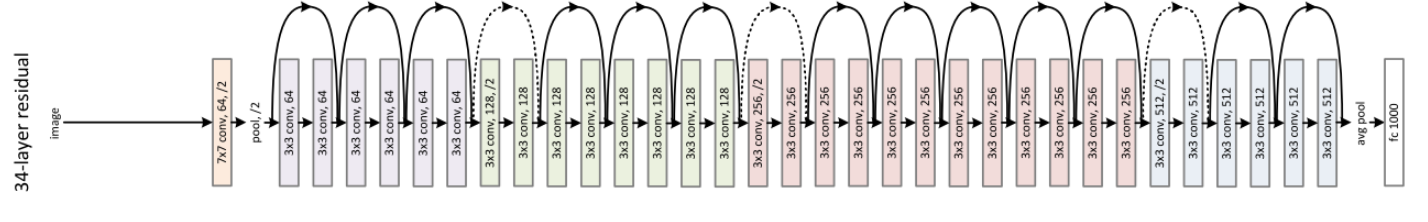

在ResNet网络中有如下几个亮点：

（1）提出residual结构（残差结构），并搭建超深的网络结构(突破1000层)<br>
（2）使用Batch Normalization加速训练(丢弃dropout)

在ResNet网络提出之前，卷积神经网络都是通过将一系列卷积层与下采样层进行堆叠得到的。但是当堆叠到一定网络深度时，就会出现两个问题。<br>
（1）梯度消失或梯度爆炸。 <br>
（2）退化问题(degradation problem)。<br>

ResNet通过数据的预处理以及在网络中使用BN（Batch Normalization）层能够解决梯度消失或者梯度爆炸问题，对于退化问题ResNet论文提出了residual结构（残差结构）来减轻退化问题。下图是使用的residual结构：


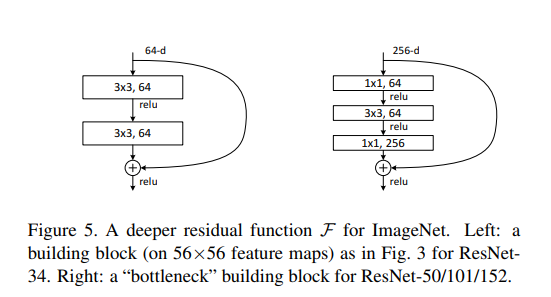

左边的残差结构是针对层数较少网络，例如ResNet18层和ResNet34层网络。右边是针对网络层数较多的网络，例如ResNet101，ResNet152等。深层网络要使用右侧的残差结构是因为右侧的残差结构能够减少网络参数与运算量。残差块代码如下：

In [7]:
#导入需要的库
import torch
import torch.nn as nn
from typing import Optional
def conv3x3(in_, out_, stride=1, initialzero = False):
    bn = nn.BatchNorm2d(out_)
    return nn.Sequential(nn.Conv2d(in_, out_
                            , kernel_size=3,padding=1, stride = stride
                            , bias = False)
                            ,bn)

def conv1x1(in_, out_, stride=1, initialzero = False):
    bn = nn.BatchNorm2d(out_)
    return nn.Sequential(nn.Conv2d(in_, out_
                            , kernel_size=1,padding=0, stride = stride
                            , bias = False)
                         ,bn)

class ResidualUnit(nn.Module):
    #这是残差单元类
    #stride1是否等于2呢？如果等于2 - 特征图尺寸会发生变化
    #需要在跳跃链接上增加1x1卷积层来调整特征图尺寸
    #如果stride1等于1，则什么也不需要做
    def __init__(self,out_: int
                 ,stride1: int = 1 #定义该参数的类型，并且定义默认值
                 ,in_ : Optional[int] = None
                ):
        super().__init__()
        
        self.stride1 = stride1
        
        #当特征图尺寸需要缩小时，卷积层的输出特征图数量out_等于输入特征图数量in_的2被
        #当特征图尺寸不需要缩小时，out_ == in_
        if stride1 !=1:
            in_ = int(out_/2)
        else:
            in_ = out_
        
        # 拟合部分，输出F(x)
        self.fit_ = nn.Sequential(conv3x3(in_,out_,stride=stride1)
                                 ,nn.ReLU(inplace=True)
                                 ,conv3x3(out_,out_,initialzero=True)
                                 )
        
        # 跳跃链接，输出x(1x1卷积核之后的x)
        self.skipconv = conv1x1(in_,out_,stride = stride1)
        
        # 单独定义放在H(x)之后来使用的激活函数ReLU
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self,x):
        fx = self.fit_(x) #拟合结果
        if self.stride1 != 1:
            x = self.skipconv(x) #跳跃链接
        hx = self.relu(fx + x)
        return hx
# 以网络中的一个块为例输入残差   
data = torch.ones(10,64,56,56)
conv3_x_18_0 = ResidualUnit(out_=128,stride1 = 2)
conv3_x_18_0(data).shape

torch.Size([10, 128, 28, 28])

# Efficientnet

EfficientNet采用NAS（Neural Architecture Search）技术来搜索网络的图像输入分辨率r，网络的深度depth以及channel的宽度width三个参数的合理化配置。在之前的一些论文中，有的会通过增加网络的卷积核的个数（增加特征矩阵的channels）来提升网络的性能如图(b)所示，有的会通过增加网络的深度即使用更多的层结构来提升网络的性能如图(c)所示，有的会通过增加输入网络的分辨率来提升网络的性能如图(d)所示。而在本篇论文是同时来探索这三个参数的影响来提升网络的性能如图(e)所示。在论文中提出的EfficientNet-B7在Imagenet top-1上达到了2019年的SOTA性能，

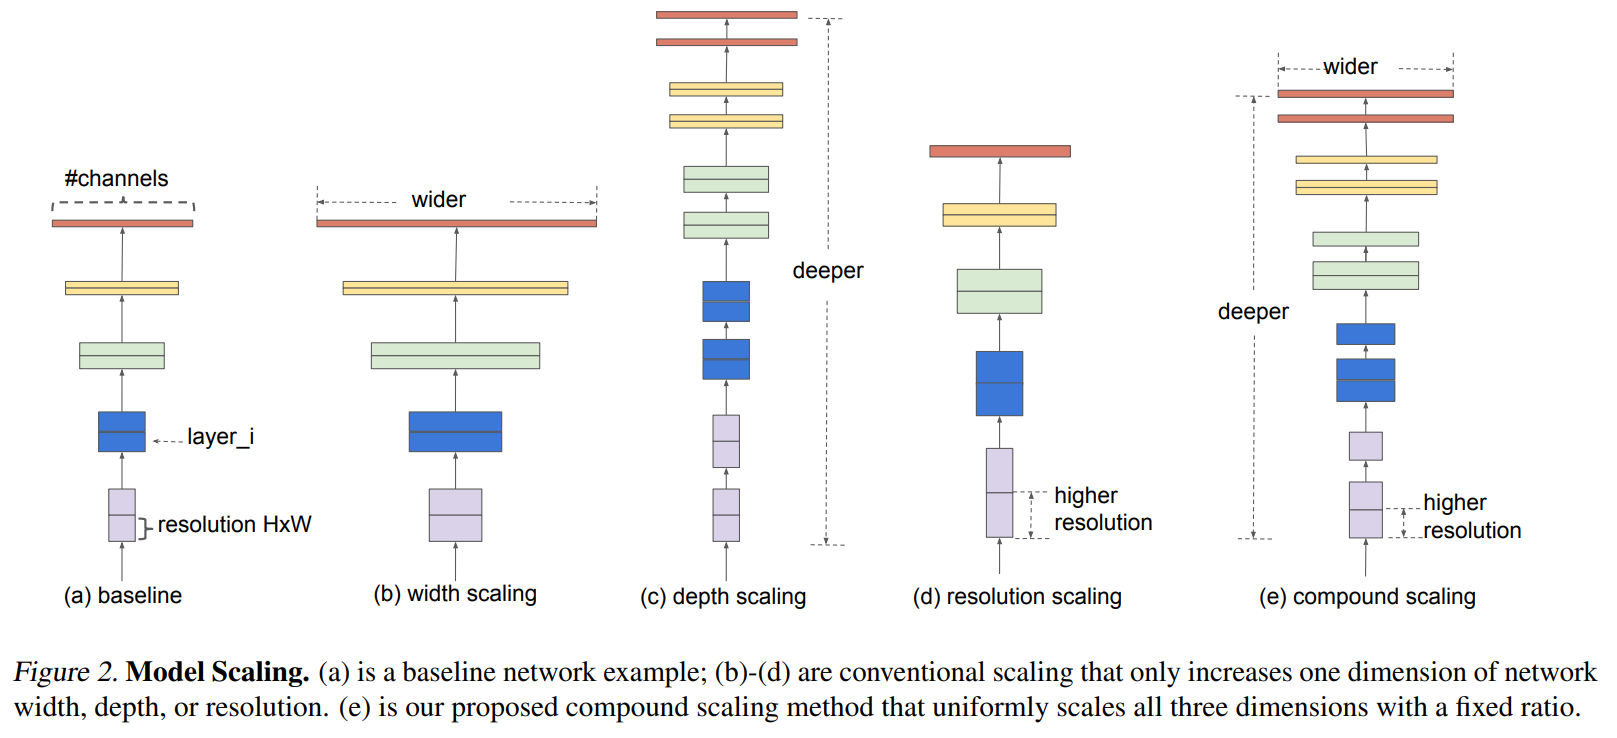

- 根据以往的经验，增加网络的深度depth能够得到更加丰富、复杂的特征并且能够很好的应用到其它任务中。但网络的深度过深会面临梯度消失，训练困难的问题。
- 增加网络的width能够获得更高细粒度的特征并且也更容易训练，但对于width很大而深度较浅的网络往往很难学习到更深层次的特征。
- 增加输入网络的图像分辨率能够潜在得获得更高细粒度的特征模板，但对于非常高的输入分辨率，准确率的增益也会减小。并且大分辨率图像会增加计算量。

下图展示了在基准EfficientNetB-0上分别增加width、depth以及resolution后得到的统计结果。通过下图可以看出大概在Accuracy达到80%时就趋于饱和了。
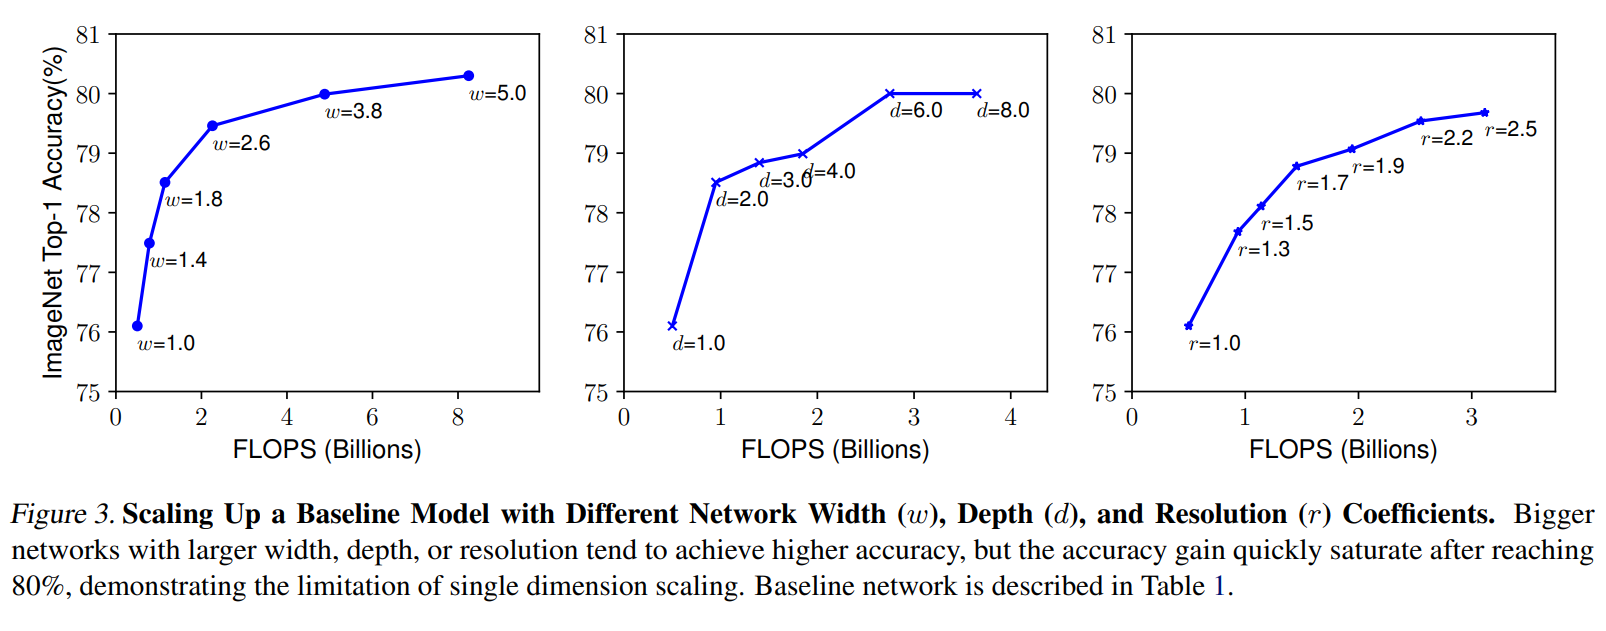

接着作者又做了一个实验，采用不同的d,r组合，然后不断改变网络的width就得到了如下图所示的4条曲线，通过分析可以发现在相同的FLOPs下，同时增加d和r的效果最好。
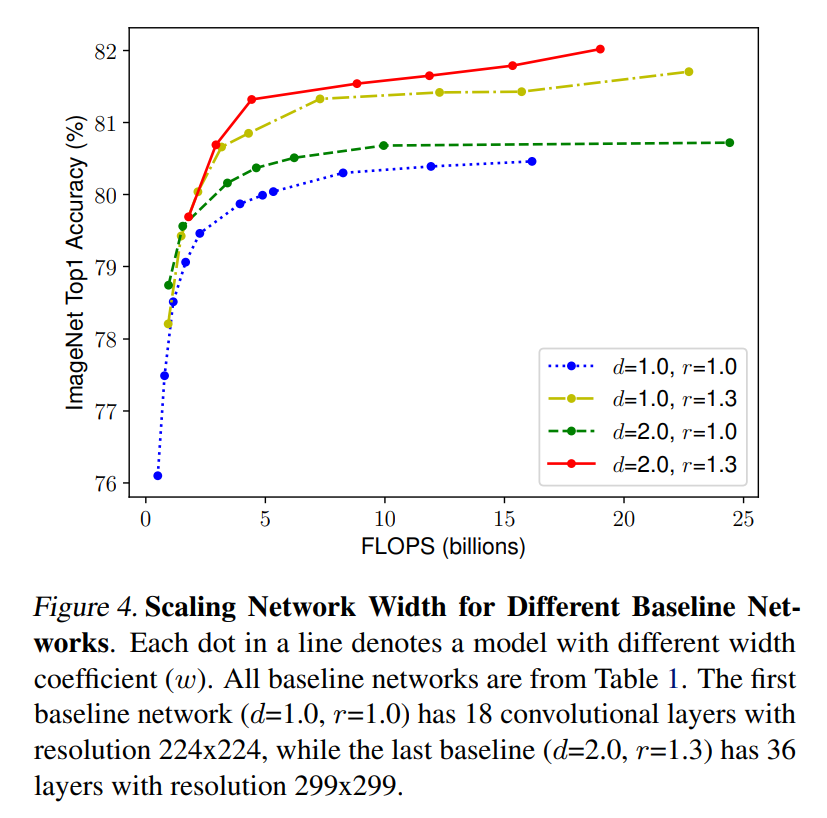

为了方便理解，以EfficientNetB0的结构为例，下表为EfficientNet-B0的网络框架（B1-B7就是在B0的基础上修改Resolution，Channels以及Layers），可以看出网络总共分成了9个Stage，第一个Stage就是一个卷积核大小为3x3步距为2的普通卷积层（包含BN和激活函数Swish），Stage2～Stage8都是在重复堆叠MBConv结构（最后一列的Layers表示该Stage重复MBConv结构多少次），而Stage9由一个普通的1x1的卷积层（包含BN和激活函数Swish）一个平均池化层和一个全连接层组成。表格中每个MBConv后会跟一个数字1或6，这里的1或6就是倍率因子n即MBConv中第一个1x1的卷积层会将输入特征矩阵的channels扩充为n倍，其中k3x3或k5x5表示MBConv中Depthwise Conv所采用的卷积核大小。Channels表示通过该Stage后输出特征矩阵的Channels。


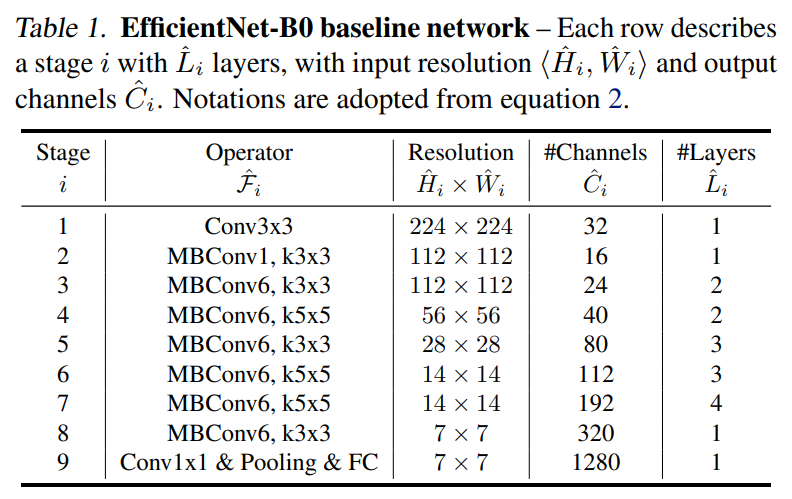

## MBConv结构

移动翻转瓶颈卷积（mobile inverted bottleneck convolution，MBConv），由深度可分离卷积Depthwise Convolution和SENet构成。MBConv结构如下图所示，MBConv结构主要由一个1x1的普通卷积（升维作用，包含BN和Swish），一个kxk的Depthwise Conv卷积（包含BN和Swish）k的具体值可看EfficientNet-B0的网络框架主要有3x3和5x5两种情况，一个SE模块，一个1x1的普通卷积（降维作用，包含BN），一个Droupout层构成。搭建过程中还需要注意几点：
- 第一个升维的1x1卷积层，它的卷积核个数是输入特征矩阵channel的n倍，n ∈ { 1 , 6 }。
- 当n=1时，不要第一个升维的1x1卷积层，即Stage2中的MBConv结构都没有第一个升维的1x1卷积层（这和MobileNetV3网络类似）。
- 关于shortcut连接，仅当输入MBConv结构的特征矩阵与输出的特征矩阵shape相同时才存在（代码中可通过stride==1 and inputc_channels==output_channels条件来判断）。
- SE模块如下所示，由一个全局平均池化，两个全连接层组成。第一个全连接层的节点个数是输入该MBConv特征矩阵channels的$\frac{1}{4}$ ，且使用Swish激活函数。第二个全连接层的节点个数等于Depthwise Conv层输出的特征矩阵channels，且使用Sigmoid激活函数。


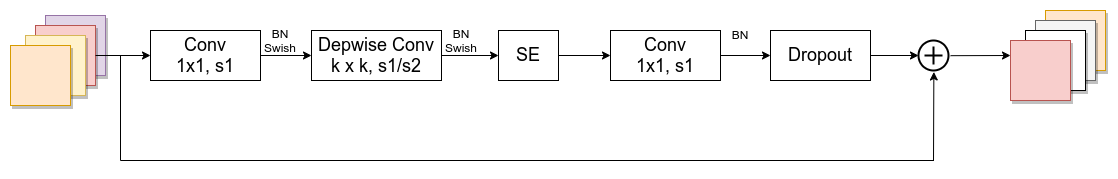

In [8]:
# MBConv代码如下
# 激活函数为silu激活函数
class SiLU(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)
# 作用就是将channel的个数，调整到离它最近的8的整数    
def _make_divisible(ch, divisor=8, min_ch=None):
    if min_ch is None:
        min_ch = divisor
    new_ch = max(min_ch, int(ch + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_ch < 0.9 * ch:
        new_ch += divisor
    return new_ch

In [9]:
# SE模块
class SELayer(nn.Module):
    def __init__(self,input_c: int,expand_c: int, squeeze_factor: int = 4):
        super(SELayer, self).__init__()
        squeeze_c = input_c // squeeze_factor
        self.fc1 = nn.Conv2d(expand_c, squeeze_c, 1)
        self.ac1 = nn.SiLU()  # alias Swish
        self.fc2 = nn.Conv2d(squeeze_c, expand_c, 1)
        self.ac2 = nn.Sigmoid()

    def forward(self, x):
        scale = F.adaptive_avg_pool2d(x, output_size=(1, 1))
        scale = self.fc1(scale)
        scale = self.ac1(scale)
        scale = self.fc2(scale)
        scale = self.ac2(scale)
        return scale * x

In [10]:
class MBConv(nn.Module):
    """
     定义MBConv模块和Fused-MBConv模块，将fused设置为1或True是Fused-MBConv，否则是MBConv
    :param inp:输入的channel
    :param oup:输出的channel
    :param stride:步长，设置为1时图片的大小不变，设置为2时，图片的面积变为原来的四分之一
    :param expand_ratio:放大的倍率
    :return:
    """
    def __init__(self, inp, oup, stride, expand_ratio):
        super(MBConv, self).__init__()
        assert stride in [1, 2]
        hidden_dim = round(inp * expand_ratio)
        self.identity = stride == 1 and inp == oup
        self.conv = nn.Sequential(
            # pw
            nn.Conv2d(inp, hidden_dim, 1, 1, 0, bias=False),
            nn.BatchNorm2d(hidden_dim),
            SiLU(),
            # dw
            nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
            nn.BatchNorm2d(hidden_dim),
            SiLU(),
            SELayer(inp, hidden_dim),
            # pw-linear
            nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
            nn.BatchNorm2d(oup),
        )

    def forward(self, x):
        if self.identity:
            return x + self.conv(x)
        else:
            return self.conv(x)
data = torch.randn(8,16,112,112)
mbonv = MBConv(16, 24, 2, 0.2)
mbonv(data).shape

torch.Size([8, 24, 56, 56])

**EfficientNet(B0-B7)参数**：
通过上表可以得到B0的网络结构，其他版本的网络详细结构参数如下表所示：

| 版本名称|缩放参数：宽度|缩放参数：深度|分辨率|Dropout率|
|:---:|:---:|:---:|:---:|:---:|
|EfficientNet-B0  |1  |  1| 224 * 224|0.2 |
|EfficientNet-B1  |1  |  1.1| 240 * 240 |0.2 |
|EfficientNet-B2  |1.1 | 1.2| 260 * 260 |0.3 |
|EfficientNet-B3  |1.2 | 1.4| 300 * 300|0.3 |
|EfficientNet-B4  |1.4  |  1.8| 380 * 380 |0.4 |
|EfficientNet-B5  |1.6  |  2.2| 456 * 456|0.4 |
|EfficientNet-B6  |1.8  |  2.6| 528 * 528|0.5 |
|EfficientNet-B7  |2.0  |  3.1| 600 * 600|0.5 |
                                        

- 分辨率代表训练网络时输入网络的图像大小
- 缩放参数：宽度代表channel维度上的倍率因子，比如在 EfficientNetB0中Stage1的3x3卷积层所使用的卷积核个数是32，那么在B6中就是32 × 1.8 = 57.6 接着取整到离它最近的8的整数倍即56，其它Stage同理。
- 缩放参数：深度代表depth维度上的倍率因子（仅针对Stage2到Stage8），比如在EfficientNetB0中Stage7的${\widehat L}_i=4$ ，那么在B6中就是4 × 2.6 = 10.4 接着向上取整即11.
- Dropout率是最后一个全连接层前的dropout层（在stage9的Pooling与FC之间）的dropout_rate。


# 作业

在kaggle的[image-classification](https://www.kaggle.com/competitions/boolart-image-classification)上使用resnet50,efficientnet-b5模型完成训练并提交结果，将模型LB得分截图发送导师。[baseline代码可参考](https://www.kaggle.com/code/qi0239/image-classification-baseline)
